# Quantum topologycal analysis of stock market data

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import gtda.time_series as ts
import gtda.diagrams as diag
import gtda.homology as hl
import gtda.graphs as gr
from gtda.pipeline import Pipeline

### Load data

The data used for analysis are the historical weekly data on **The S&P 500 Industrial Average** from 1927 up to present days (Mar 02, 2020).
Data source - **Yahoo! Finance**

In [40]:
data = pd.read_csv("../data/gspc/^GSPC-max-weekly.csv")
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4810,2020-03-02,2974.280029,3136.719971,2901.540039,2972.370117,2972.370117,2.989551e+10
4811,2020-03-09,2863.889893,2882.590088,2478.860107,2711.020020,2711.020020,4.052117e+10
4812,2020-03-16,2508.590088,2562.979980,2280.520020,2304.919922,2304.919922,4.188722e+10
4813,2020-03-23,2290.709961,2637.010010,2191.860107,2541.469971,2541.469971,3.718269e+10
4814,2020-03-30,2558.979980,2641.389893,2447.489990,2470.500000,2470.500000,1.826241e+10


### Plot data
It is a common practice to view stock prices data as time series data and visualise them as a scatter plot.
Here is a plot of Close values on The S&P 500 Industrial Average during 1927 - present.

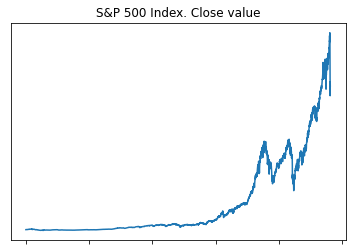

In [41]:
plt.plot(data["Close"])

plt.title("S&P 500 Index. Close value")

gspc_plot = plt.gca()
gspc_plot.axes.get_yaxis().set_visible(False)
for xlabel_i in gspc_plot.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)

plt.show()

### Time series data to point cloud

Viewing stock prices data in 2 dimensions allows one to easily track **local** behavior of stock prices, however higher dimnesional data usually prove themselves 

In [42]:
embedding_dim = 3
embedding_time_delay = 1

In [43]:
embedder = ts.TakensEmbedding(
            parameters_type="fixed",
            dimension=embedding_dim,
            time_delay=embedding_time_delay,
            n_jobs=-1
)

In [54]:
# prices = data['Close'].values

data.isin([np.nan, np.inf, -np.inf]).any(1)

# import math

# prev_valid = 0
# for i in range(len(prices)):
#     if math.isnan(prices[i]) or math.isinf(prices[i]):
#         prices[i] = prices[prev_valid]
#     else:
#         prev_valid = i

0       False
1       False
2       False
3       False
4       False
        ...  
4810    False
4811    False
4812    False
4813    False
4814    False
Length: 4815, dtype: bool

In [52]:
price_embedded = embedder.fit_transform(prices)

embedder_time_delay = embedder.time_delay_
embedder_dimension = embedder.dimension_

TypeError: check_is_fitted() missing 1 required positional argument: 'attributes'